In [7]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [9]:
data.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], axis=1, inplace=True)
data

,Age,Outcome
0,50.0,1.0
1,31.0,0.0
2,32.0,1.0
3,21.0,0.0
4,NaN,1.0
...,...,...
763,63.0,0.0
764,NaN,0.0
765,30.0,0.0
766,47.0,1.0


In [10]:
data=data[np.isfinite(data).all(1)]

In [11]:
x_train, x_test, y_train, y_test=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2)
lr = LogisticRegression()
lr.fit(x_train ,y_train)


LogisticRegression()

In [12]:
y_pred= lr.predict(x_test)
print("predicted")
print(y_pred[:5])
print("actual")
print(y_test[:5])


predicted
[0. 0. 0. 0. 0.]
actual
49     0.0
36     0.0
555    0.0
116    1.0
46     0.0
Name: Outcome, dtype: float64


C:\Users\gbopa\AppData\Local\Temp\ipykernel_33576\4027163934.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [13]:
accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy = {accuracy}")
f1 = f1_score(y_pred, y_test)
print(f"f1 = {f1}")
recall = recall_score(y_pred, y_test)
print(f"recall = {recall}")
precision = precision_score(y_pred, y_test)
print(f"precision = {precision}")
matthew = matthews_corrcoef(y_pred, y_test)
print(f"matthew = {matthew}")

accuracy = 0.673202614379085
f1 = 0.2647058823529412
recall = 0.5
precision = 0.18
matthew = 0.13483779059841786


<AxesSubplot: >

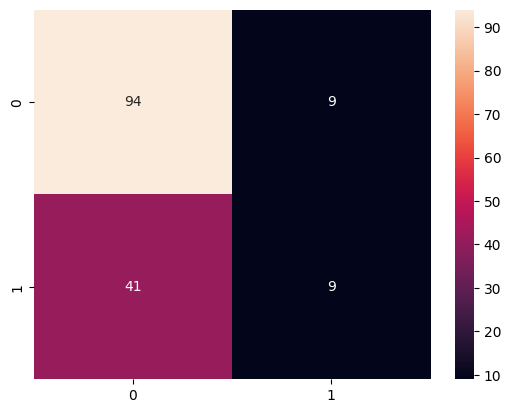

In [14]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, color='Red')